In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

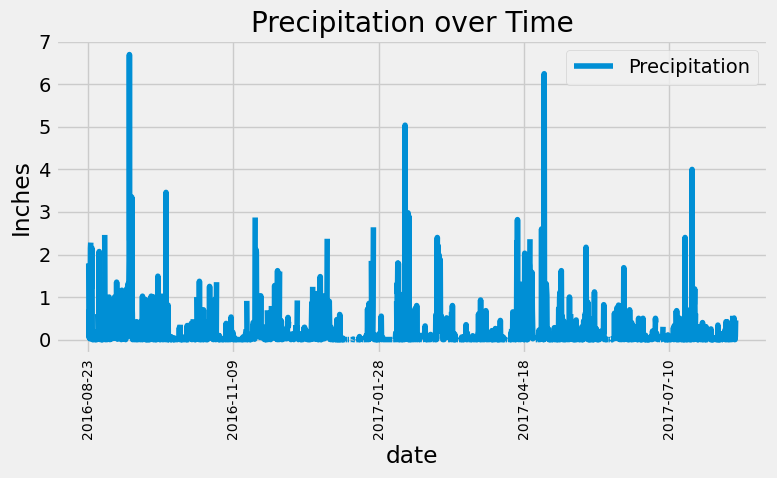

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_ealier = recent_date-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_date=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=one_year_ealier)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
 # Plot the Results in a Matplotlib bar chart

df = pd.DataFrame(precipitation_date, columns=['date', 'precipitation'])


# Sort the dataframe by date
df = df.sort_values(by='date')


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', kind='line', figsize=(8, 5), legend='precipitation',title='Precipitation over Time')
plt.legend(["Precipitation"], loc='upper right')
plt.xticks(rotation=90,size=10)
plt.ylabel("Inches")
plt.tight_layout() 
plt.show()


In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_station_id=session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station==act_station_id.station).all()

[(54.0, 85.0, 71.66378066378067)]

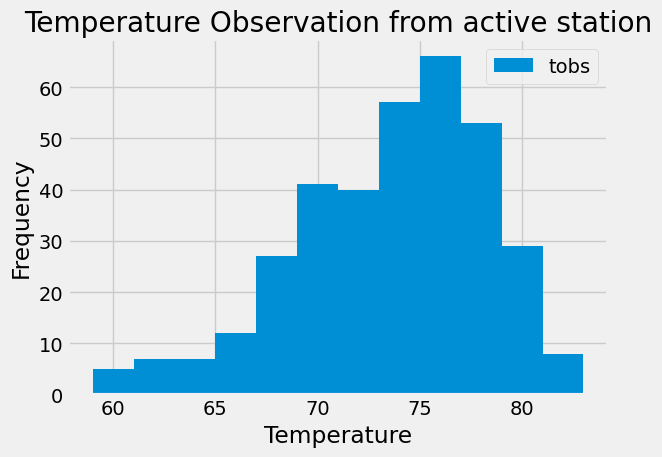

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
act_station = session.query(Measurement.tobs).filter(Measurement.station==act_station_id.station)\
.filter(Measurement.date>=one_year_ealier)

act_station_his=pd.DataFrame(act_station,columns=['tobs'])

plt.hist(act_station_his,bins = 12)
plt.legend(["tobs"], loc='upper right')
plt.title("Temperature Observation from active station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout() 
plt.show()


# Close Session

In [45]:
# Close Session
session.close()